In [109]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
zero = 1e-1
cutoff = 10
err = 1.49e-2
mu = 0
beta = 1
R = 1/30
omega = 1
eps = 1e-2
def xi(k, mu=mu):
    xi = k**2 - mu
    return xi
def n(p, beta=beta):
    n = 1 / (np.exp(beta*xi(p)) - 1)
    return n
def z(omega, q, mu=mu):
    z = omega - 2*q - 2*mu
    return z

def PI(eps=eps, omega=omega, mu=mu, zero=zero, cutoff=cutoff, err=err):    

    Iimg, error = integrate.quad(lambda k:(k**4 * (1 + n(k+q/2) + n(-k+q/2))/(xi(k+q/2) + xi(-k+q/2) - omega)) ,zero, cutoff, epsabs=err)
    I = Iimg
    PI = 2/(np.pi**2) * I
    return PI
def PIr(q, omega, R=R, mu=mu, zero=zero, cutoff=cutoff, err=err):
    I, error = integrate.quad(lambda k: k**2, zero, cutoff, epsabs=err)
    PIr = -1/(np.pi**2) * I
    I, error = integrate.quad(lambda k: 1, zero, cutoff, epsabs=err)
    PIr = PIr - z(omega, q)/(2*np.pi**2) * I
    PIr = R * PIr
    return PIr


print(PI(.1,1))

NameError: name 'q' is not defined

In [7]:
II, err = integrate.quad(lambda x: x**2,0,3,epsabs=1.49e-2)
print(II, err)

9.000000000000002 9.992007221626411e-14


2026.9398284931513


In [61]:
a = 1 + 2j
c = lambda x: x**2
b = lambda x: x**3
d = lambda x: c+b
A = integrate.quad(b, 
                   0,1)
print(a)
print(A)
print(np.angle(a))
print(np.arctan(2))

(1+2j)
(0.25, 2.7755575615628914e-15)
1.1071487177940904
1.1071487177940904


In [93]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
zero = 1e-1
cutoff = 1
err = 1.49e-1
mu = 0
beta = 1e-2
R = 1/30
omega = 1
eps = .1                        # infinite small imaginary part 
rkv = 0                         # 2R_p/(k_n^2 v_p)
def xi(k, mu=mu):
    xi = k**2 - mu
    return xi
def n(p, beta=beta, mu=mu):
    n = 1 / (np.exp(beta*xi(p)) - 1)
    return n
def z(omega, q, mu=mu):
    z = omega - 2*q - 2*mu
    return z

def PI(omega, q, eps=eps, mu=mu, zero=zero, cutoff=cutoff,
       err=err):
    def a(k):
        a = (1 + n(k+q/2) + n(-k+q/2))
        return a
    def b(k):
        b = (xi(k+q/2) + xi(-k+q/2) - omega)
        return b
    Irel, error = integrate.quad(lambda k: k**4*(a(k)*b(k)/(b(k)**2 +
                                                            eps**2)), 
                                 zero, cutoff, epsabs=err)
    Iimg, error = integrate.quad(lambda k: k**4*(a(k)*eps**2/(b(k)**2 +
                                                               eps**2)), 
                                 zero, cutoff, epsabs=err)
    I = Irel -1j * Iimg
    PI = 2/(np.pi**2) * I
    return PI
def PIr(q, omega, R=R, mu=mu, zero=zero, cutoff=cutoff, err=err):
    I, error = integrate.quad(lambda k: k**2, zero, cutoff, epsabs=err)
    PIr = -1/(np.pi**2) * I
    I, error = integrate.quad(lambda k: 1, zero, cutoff, epsabs=err)
    PIr = PIr - z(omega, q)/(2*np.pi**2) * I
    PIr = PIr + PI(omega, q)
    PIr = R * PIr
    return PIr

def delta(omega, q, rkv):
    delta = rkv/(4*np.pi) + z(omega, q) + PIr(q, omega)
    delta = np.angle(delta)
    return delta

def omegaInt(rkv, mcutoff=-cutoff, pcutoff=cutoff, cutoff=cutoff):
    f = lambda q, omega: 3 * q**2 * n(omega) * delta (q, omega, rkv)
    omegaInt, error = integrate.dblquad(f, mcutoff, pcutoff, lambda
                                        omega: 0, lambda omega: cutoff
                                        , epsabs=err) 
    return omegaInt



#print(omegaInt(0))
print(delta(1,1,0))
print(n(0.1))

nan
9999.500008329007


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


p -1.0
mu 1
beta 1
ximu 1
xi 0.0
ximu 1
p -0.9999099909990999
mu 1
beta 1
ximu 1
xi -0.00018000990017985607
ximu 1
p -0.9998199819981998
mu 1
beta 1
ximu 1
xi -0.0003600035971195181
ximu 1
p -0.9997299729972997
mu 1
beta 1
ximu 1
xi -0.000539981090818431
ximu 1
p -0.9996399639963996
mu 1
beta 1
ximu 1
xi -0.0007199423812768169
ximu 1
p -0.9995499549954996
mu 1
beta 1
ximu 1
xi -0.0008998874684947866
ximu 1
p -0.9994599459945994
mu 1
beta 1
ximu 1
xi -0.0010798163524724513
ximu 1
p -0.9993699369936994
mu 1
beta 1
ximu 1
xi -0.001259729033209367
ximu 1
p -0.9992799279927993
mu 1
beta 1
ximu 1
xi -0.0014396255107058664
ximu 1
p -0.9991899189918992
mu 1
beta 1
ximu 1
xi -0.0016195057849618388
ximu 1
p -0.9990999099909991
mu 1
beta 1
ximu 1
xi -0.0017993698559775062
ximu 1
p -0.999009900990099
mu 1
beta 1
ximu 1
xi -0.0019792177237525355
ximu 1
p -0.998919891989199
mu 1
beta 1
ximu 1
xi -0.0021590493882871487
ximu 1
p -0.9988298829882988
mu 1
beta 1
ximu 1
xi -0.0023388648495813458
ximu 1
p

p -0.9737173717371738
mu 1
beta 1
ximu 1
xi -0.05187447997725059
ximu 1
p -0.9736273627362736
mu 1
beta 1
ximu 1
xi -0.052049758531208745
ximu 1
p -0.9735373537353735
mu 1
beta 1
ximu 1
xi -0.052225020881926154
ximu 1
p -0.9734473447344735
mu 1
beta 1
ximu 1
xi -0.05240026702940315
ximu 1
p -0.9733573357335734
mu 1
beta 1
ximu 1
xi -0.05257549697363961
ximu 1
p -0.9732673267326732
mu 1
beta 1
ximu 1
xi -0.052750710714635884
ximu 1
p -0.9731773177317732
mu 1
beta 1
ximu 1
xi -0.05292590825239141
ximu 1
p -0.9730873087308731
mu 1
beta 1
ximu 1
xi -0.0531010895869064
ximu 1
p -0.972997299729973
mu 1
beta 1
ximu 1
xi -0.053276254718181204
ximu 1
p -0.9729072907290729
mu 1
beta 1
ximu 1
xi -0.053451403646215256
ximu 1
p -0.9728172817281728
mu 1
beta 1
ximu 1
xi -0.05362653637100878
ximu 1
p -0.9727272727272728
mu 1
beta 1
ximu 1
xi -0.05380165289256189
ximu 1
p -0.9726372637263726
mu 1
beta 1
ximu 1
xi -0.053976753210874695
ximu 1
p -0.9725472547254725
mu 1
beta 1
ximu 1
xi -0.0541518373259

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


xi -0.05904761403233039
ximu 1
p -0.9699369936993699
mu 1
beta 1
ximu 1
xi -0.05922222825342849
ximu 1
p -0.9698469846984699
mu 1
beta 1
ximu 1
xi -0.05939682627128595
ximu 1
p -0.9697569756975698
mu 1
beta 1
ximu 1
xi -0.059571408085903
ximu 1
p -0.9696669666966696
mu 1
beta 1
ximu 1
xi -0.05974597369727974
ximu 1
p -0.9695769576957696
mu 1
beta 1
ximu 1
xi -0.059920523105415846
ximu 1
p -0.9694869486948695
mu 1
beta 1
ximu 1
xi -0.06009505631031142
ximu 1
p -0.9693969396939695
mu 1
beta 1
ximu 1
xi -0.060269573311966584
ximu 1
p -0.9693069306930693
mu 1
beta 1
ximu 1
xi -0.06044407411038144
ximu 1
p -0.9692169216921692
mu 1
beta 1
ximu 1
xi -0.06061855870555555
ximu 1
p -0.9691269126912692
mu 1
beta 1
ximu 1
xi -0.06079302709748913
ximu 1
p -0.969036903690369
mu 1
beta 1
ximu 1
xi -0.06096747928618251
ximu 1
p -0.9689468946894689
mu 1
beta 1
ximu 1
xi -0.06114191527163526
ximu 1
p -0.9688568856885689
mu 1
beta 1
ximu 1
xi -0.06131633505384737
ximu 1
p -0.9687668766876688
mu 1
beta 1


ximu 1
xi -0.12339169470502398
ximu 1
p -0.9361836183618362
mu 1
beta 1
ximu 1
xi -0.12356023271093985
ximu 1
p -0.9360936093609361
mu 1
beta 1
ximu 1
xi -0.1237287545136152
ximu 1
p -0.936003600360036
mu 1
beta 1
ximu 1
xi -0.12389726011304991
ximu 1
p -0.9359135913591359
mu 1
beta 1
ximu 1
xi -0.12406574950924443
ximu 1
p -0.9358235823582358
mu 1
beta 1
ximu 1
xi -0.1242342227021982
ximu 1
p -0.9357335733573358
mu 1
beta 1
ximu 1
xi -0.12440267969191154
ximu 1
p -0.9356435643564356
mu 1
beta 1
ximu 1
xi -0.12457112047838459
ximu 1
p -0.9355535553555355
mu 1
beta 1
ximu 1
xi -0.12473954506161689
ximu 1
p -0.9354635463546355
mu 1
beta 1
ximu 1
xi -0.12490795344160877
ximu 1
p -0.9353735373537354
mu 1
beta 1
ximu 1
xi -0.12507634561836012
ximu 1
p -0.9352835283528353
mu 1
beta 1
ximu 1
xi -0.12524472159187106
ximu 1
p -0.9351935193519352
mu 1
beta 1
ximu 1
xi -0.1254130813621417
ximu 1
p -0.9351035103510351
mu 1
beta 1
ximu 1
xi -0.12558142492917157
ximu 1
p -0.9350135013501351
mu 1
bet

mu 1
beta 1
ximu 1
xi -0.19226663890511464
ximu 1
p -0.8986498649864987
mu 1
beta 1
ximu 1
xi -0.1924284201597477
ximu 1
p -0.8985598559855985
mu 1
beta 1
ximu 1
xi -0.19259018521114046
ximu 1
p -0.8984698469846985
mu 1
beta 1
ximu 1
xi -0.19275193405929258
ximu 1
p -0.8983798379837984
mu 1
beta 1
ximu 1
xi -0.19291366670420418
ximu 1
p -0.8982898289828983
mu 1
beta 1
ximu 1
xi -0.19307538314587525
ximu 1
p -0.8981998199819982
mu 1
beta 1
ximu 1
xi -0.19323708338430612
ximu 1
p -0.8981098109810981
mu 1
beta 1
ximu 1
xi -0.19339876741949624
ximu 1
p -0.898019801980198
mu 1
beta 1
ximu 1
xi -0.19356043525144595
ximu 1
p -0.897929792979298
mu 1
beta 1
ximu 1
xi -0.19372208688015502
ximu 1
p -0.8978397839783978
mu 1
beta 1
ximu 1
xi -0.193883722305624
ximu 1
p -0.8977497749774977
mu 1
beta 1
ximu 1
xi -0.19404534152785213
ximu 1
p -0.8976597659765977
mu 1
beta 1
ximu 1
xi -0.19420694454683984
ximu 1
p -0.8975697569756975
mu 1
beta 1
ximu 1
xi -0.19436853136258725
ximu 1
p -0.89747974797479

mu 1
beta 1
ximu 1
xi -0.24680724058004355
ximu 1
p -0.8677767776777678
mu 1
beta 1
ximu 1
xi -0.24696346412318992
ximu 1
p -0.8676867686768677
mu 1
beta 1
ximu 1
xi -0.24711967146309588
ximu 1
p -0.8675967596759676
mu 1
beta 1
ximu 1
xi -0.2472758625997613
ximu 1
p -0.8675067506750676
mu 1
beta 1
ximu 1
xi -0.2474320375331862
ximu 1
p -0.8674167416741674
mu 1
beta 1
ximu 1
xi -0.2475881962633708
ximu 1
p -0.8673267326732673
mu 1
beta 1
ximu 1
xi -0.24774433879031466
ximu 1
p -0.8672367236723673
mu 1
beta 1
ximu 1
xi -0.2479004651140181
ximu 1
p -0.8671467146714671
mu 1
beta 1
ximu 1
xi -0.2480565752344812
ximu 1
p -0.867056705670567
mu 1
beta 1
ximu 1
xi -0.2482126691517037
ximu 1
p -0.866966696669667
mu 1
beta 1
ximu 1
xi -0.24836874686568566
ximu 1
p -0.8668766876687669
mu 1
beta 1
ximu 1
xi -0.2485248083764271
ximu 1
p -0.8667866786678669
mu 1
beta 1
ximu 1
xi -0.24868085368392812
ximu 1
p -0.8666966696669667
mu 1
beta 1
ximu 1
xi -0.24883688278818883
ximu 1
p -0.8666066606660666
m

mu 1
beta 1
ximu 1
xi -0.3084528173789476
ximu 1
p -0.8315031503150315
mu 1
beta 1
ximu 1
xi -0.3086025110161781
ximu 1
p -0.8314131413141315
mu 1
beta 1
ximu 1
xi -0.30875218845016805
ximu 1
p -0.8313231323132313
mu 1
beta 1
ximu 1
xi -0.3089018496809177
ximu 1
p -0.8312331233123312
mu 1
beta 1
ximu 1
xi -0.30905149470842674
ximu 1
p -0.8311431143114312
mu 1
beta 1
ximu 1
xi -0.30920112353269524
ximu 1
p -0.831053105310531
mu 1
beta 1
ximu 1
xi -0.30935073615372344
ximu 1
p -0.8309630963096309
mu 1
beta 1
ximu 1
xi -0.309500332571511
ximu 1
p -0.8308730873087309
mu 1
beta 1
ximu 1
xi -0.309649912786058
ximu 1
p -0.8307830783078308
mu 1
beta 1
ximu 1
xi -0.30979947679736464
ximu 1
p -0.8306930693069308
mu 1
beta 1
ximu 1
xi -0.3099490246054307
ximu 1
p -0.8306030603060306
mu 1
beta 1
ximu 1
xi -0.3100985562102565
ximu 1
p -0.8305130513051305
mu 1
beta 1
ximu 1
xi -0.31024807161184165
ximu 1
p -0.8304230423042305
mu 1
beta 1
ximu 1
xi -0.31039757081018626
ximu 1
p -0.8303330333033303
mu

ximu 1
xi -0.3698984218853928
ximu 1
p -0.7936993699369937
mu 1
beta 1
ximu 1
xi -0.3700413101616191
ximu 1
p -0.7936093609360936
mu 1
beta 1
ximu 1
xi -0.37018418223460514
ximu 1
p -0.7935193519351935
mu 1
beta 1
ximu 1
xi -0.3703270381043505
ximu 1
p -0.7934293429342935
mu 1
beta 1
ximu 1
xi -0.3704698777708554
ximu 1
p -0.7933393339333934
mu 1
beta 1
ximu 1
xi -0.3706127012341197
ximu 1
p -0.7932493249324932
mu 1
beta 1
ximu 1
xi -0.37075550849414374
ximu 1
p -0.7931593159315932
mu 1
beta 1
ximu 1
xi -0.3708982995509271
ximu 1
p -0.7930693069306931
mu 1
beta 1
ximu 1
xi -0.3710410744044701
ximu 1
p -0.7929792979297929
mu 1
beta 1
ximu 1
xi -0.37118383305477265
ximu 1
p -0.7928892889288929
mu 1
beta 1
ximu 1
xi -0.3713265755018347
ximu 1
p -0.7927992799279928
mu 1
beta 1
ximu 1
xi -0.37146930174565607
ximu 1
p -0.7927092709270928
mu 1
beta 1
ximu 1
xi -0.37161201178623704
ximu 1
p -0.7926192619261927
mu 1
beta 1
ximu 1
xi -0.3717547056235775
ximu 1
p -0.7925292529252925
mu 1
beta 1
x

ximu 1
p -0.7524752475247525
mu 1
beta 1
ximu 1
xi -0.4337810018625625
ximu 1
p -0.7523852385238524
mu 1
beta 1
ximu 1
xi -0.4339164528514057
ximu 1
p -0.7522952295229524
mu 1
beta 1
ximu 1
xi -0.4340518876370084
ximu 1
p -0.7522052205220522
mu 1
beta 1
ximu 1
xi -0.43418730621937085
ximu 1
p -0.7521152115211521
mu 1
beta 1
ximu 1
xi -0.43432270859849265
ximu 1
p -0.7520252025202521
mu 1
beta 1
ximu 1
xi -0.4344580947743739
ximu 1
p -0.7519351935193519
mu 1
beta 1
ximu 1
xi -0.43459346474701477
ximu 1
p -0.7518451845184518
mu 1
beta 1
ximu 1
xi -0.4347288185164151
ximu 1
p -0.7517551755175518
mu 1
beta 1
ximu 1
xi -0.4348641560825749
ximu 1
p -0.7516651665166517
mu 1
beta 1
ximu 1
xi -0.4349994774454943
ximu 1
p -0.7515751575157515
mu 1
beta 1
ximu 1
xi -0.43513478260517324
ximu 1
p -0.7514851485148515
mu 1
beta 1
ximu 1
xi -0.43527007156161157
ximu 1
p -0.7513951395139514
mu 1
beta 1
ximu 1
xi -0.4354053443148095
ximu 1
p -0.7513051305130514
mu 1
beta 1
ximu 1
xi -0.43554060086476687


ximu 1
p -0.7187218721872187
mu 1
beta 1
ximu 1
xi -0.48343887043969924
ximu 1
p -0.7186318631863187
mu 1
beta 1
ximu 1
xi -0.48356824521336017
ximu 1
p -0.7185418541854185
mu 1
beta 1
ximu 1
xi -0.4836976037837808
ximu 1
p -0.7184518451845185
mu 1
beta 1
ximu 1
xi -0.48382694615096056
ximu 1
p -0.7183618361836184
mu 1
beta 1
ximu 1
xi -0.48395627231490024
ximu 1
p -0.7182718271827182
mu 1
beta 1
ximu 1
xi -0.4840855822755994
ximu 1
p -0.7181818181818183
mu 1
beta 1
ximu 1
xi -0.4842148760330578
ximu 1
p -0.7180918091809181
mu 1
beta 1
ximu 1
xi -0.4843441535872759
ximu 1
p -0.718001800180018
mu 1
beta 1
ximu 1
xi -0.48447341493825347
ximu 1
p -0.717911791179118
mu 1
beta 1
ximu 1
xi -0.4846026600859905
ximu 1
p -0.7178217821782178
mu 1
beta 1
ximu 1
xi -0.48473188903048725
ximu 1
p -0.7177317731773177
mu 1
beta 1
ximu 1
xi -0.48486110177174335
ximu 1
p -0.7176417641764177
mu 1
beta 1
ximu 1
xi -0.4849902983097589
ximu 1
p -0.7175517551755175
mu 1
beta 1
ximu 1
xi -0.4851194786445342
x

ximu 1
xi -0.5358601125639116
ximu 1
p -0.6811881188118811
mu 1
beta 1
ximu 1
xi -0.5359827467895305
ximu 1
p -0.6810981098109812
mu 1
beta 1
ximu 1
xi -0.5361053648119086
ximu 1
p -0.681008100810081
mu 1
beta 1
ximu 1
xi -0.5362279666310465
ximu 1
p -0.680918091809181
mu 1
beta 1
ximu 1
xi -0.5363505522469438
ximu 1
p -0.6808280828082809
mu 1
beta 1
ximu 1
xi -0.5364731216596006
ximu 1
p -0.6807380738073807
mu 1
beta 1
ximu 1
xi -0.536595674869017
ximu 1
p -0.6806480648064807
mu 1
beta 1
ximu 1
xi -0.536718211875193
ximu 1
p -0.6805580558055806
mu 1
beta 1
ximu 1
xi -0.5368407326781283
ximu 1
p -0.6804680468046804
mu 1
beta 1
ximu 1
xi -0.5369632372778232
ximu 1
p -0.6803780378037804
mu 1
beta 1
ximu 1
xi -0.5370857256742776
ximu 1
p -0.6802880288028803
mu 1
beta 1
ximu 1
xi -0.5372081978674915
ximu 1
p -0.6801980198019801
mu 1
beta 1
ximu 1
xi -0.537330653857465
ximu 1
p -0.6801080108010802
mu 1
beta 1
ximu 1
xi -0.5374530936441978
ximu 1
p -0.68001800180018
mu 1
beta 1
ximu 1
xi -0.

xi -0.5903308701707253
ximu 1
p -0.63996399639964
mu 1
beta 1
ximu 1
xi -0.5904460833122016
ximu 1
p -0.6398739873987399
mu 1
beta 1
ximu 1
xi -0.5905612802504372
ximu 1
p -0.6397839783978398
mu 1
beta 1
ximu 1
xi -0.5906764609854325
ximu 1
p -0.6396939693969397
mu 1
beta 1
ximu 1
xi -0.5907916255171872
ximu 1
p -0.6396039603960396
mu 1
beta 1
ximu 1
xi -0.5909067738457014
ximu 1
p -0.6395139513951396
mu 1
beta 1
ximu 1
xi -0.5910219059709751
ximu 1
p -0.6394239423942394
mu 1
beta 1
ximu 1
xi -0.5911370218930084
ximu 1
p -0.6393339333933393
mu 1
beta 1
ximu 1
xi -0.5912521216118012
ximu 1
p -0.6392439243924393
mu 1
beta 1
ximu 1
xi -0.5913672051273534
ximu 1
p -0.6391539153915391
mu 1
beta 1
ximu 1
xi -0.5914822724396653
ximu 1
p -0.6390639063906391
mu 1
beta 1
ximu 1
xi -0.5915973235487364
ximu 1
p -0.638973897389739
mu 1
beta 1
ximu 1
xi -0.5917123584545674
ximu 1
p -0.6388838883888389
mu 1
beta 1
ximu 1
xi -0.5918273771571576
ximu 1
p -0.6387938793879389
mu 1
beta 1
ximu 1
xi -0.591

xi -0.6323995459852016
ximu 1
p -0.6062106210621062
mu 1
beta 1
ximu 1
xi -0.6325086829114954
ximu 1
p -0.6061206120612062
mu 1
beta 1
ximu 1
xi -0.6326178036345489
ximu 1
p -0.606030603060306
mu 1
beta 1
ximu 1
xi -0.6327269081543618
ximu 1
p -0.605940594059406
mu 1
beta 1
ximu 1
xi -0.632835996470934
ximu 1
p -0.6058505850585059
mu 1
beta 1
ximu 1
xi -0.6329450685842661
ximu 1
p -0.6057605760576058
mu 1
beta 1
ximu 1
xi -0.6330541244943575
ximu 1
p -0.6056705670567057
mu 1
beta 1
ximu 1
xi -0.6331631642012086
ximu 1
p -0.6055805580558056
mu 1
beta 1
ximu 1
xi -0.6332721877048191
ximu 1
p -0.6054905490549055
mu 1
beta 1
ximu 1
xi -0.6333811950051891
ximu 1
p -0.6054005400540055
mu 1
beta 1
ximu 1
xi -0.6334901861023186
ximu 1
p -0.6053105310531053
mu 1
beta 1
ximu 1
xi -0.6335991609962077
ximu 1
p -0.6052205220522052
mu 1
beta 1
ximu 1
xi -0.6337081196868561
ximu 1
p -0.6051305130513052
mu 1
beta 1
ximu 1
xi -0.6338170621742643
ximu 1
p -0.605040504050405
mu 1
beta 1
ximu 1
xi -0.6339

p -0.5649864986498649
mu 1
beta 1
ximu 1
xi -0.6807902563433661
ximu 1
p -0.564896489648965
mu 1
beta 1
ximu 1
xi -0.6808919559822768
ximu 1
p -0.5648064806480648
mu 1
beta 1
ximu 1
xi -0.6809936394179472
ximu 1
p -0.5647164716471647
mu 1
beta 1
ximu 1
xi -0.6810953066503771
ximu 1
p -0.5646264626462647
mu 1
beta 1
ximu 1
xi -0.6811969576795662
ximu 1
p -0.5645364536453645
mu 1
beta 1
ximu 1
xi -0.6812985925055152
ximu 1
p -0.5644464446444645
mu 1
beta 1
ximu 1
xi -0.6814002111282236
ximu 1
p -0.5643564356435644
mu 1
beta 1
ximu 1
xi -0.6815018135476913
ximu 1
p -0.5642664266426642
mu 1
beta 1
ximu 1
xi -0.6816033997639188
ximu 1
p -0.5641764176417642
mu 1
beta 1
ximu 1
xi -0.6817049697769058
ximu 1
p -0.5640864086408641
mu 1
beta 1
ximu 1
xi -0.6818065235866521
ximu 1
p -0.563996399639964
mu 1
beta 1
ximu 1
xi -0.681908061193158
ximu 1
p -0.563906390639064
mu 1
beta 1
ximu 1
xi -0.6820095825964234
ximu 1
p -0.5638163816381638
mu 1
beta 1
ximu 1
xi -0.6821110877964485
ximu 1
p -0.56372

beta 1
ximu 1
xi -0.7256729732379179
ximu 1
p -0.5236723672367236
mu 1
beta 1
ximu 1
xi -0.7257672517926861
ximu 1
p -0.5235823582358237
mu 1
beta 1
ximu 1
xi -0.7258615141442136
ximu 1
p -0.5234923492349235
mu 1
beta 1
ximu 1
xi -0.7259557602925009
ximu 1
p -0.5234023402340234
mu 1
beta 1
ximu 1
xi -0.7260499902375476
ximu 1
p -0.5233123312331234
mu 1
beta 1
ximu 1
xi -0.7261442039793538
ximu 1
p -0.5232223222322232
mu 1
beta 1
ximu 1
xi -0.7262384015179195
ximu 1
p -0.5231323132313231
mu 1
beta 1
ximu 1
xi -0.7263325828532448
ximu 1
p -0.5230423042304231
mu 1
beta 1
ximu 1
xi -0.7264267479853295
ximu 1
p -0.5229522952295229
mu 1
beta 1
ximu 1
xi -0.7265208969141739
ximu 1
p -0.522862286228623
mu 1
beta 1
ximu 1
xi -0.7266150296397775
ximu 1
p -0.5227722772277228
mu 1
beta 1
ximu 1
xi -0.7267091461621409
ximu 1
p -0.5226822682268226
mu 1
beta 1
ximu 1
xi -0.7268032464812639
ximu 1
p -0.5225922592259227
mu 1
beta 1
ximu 1
xi -0.726897330597146
ximu 1
p -0.5225022502250225
mu 1
beta 1
x

ximu 1
p -0.4862286228622863
mu 1
beta 1
ximu 1
xi -0.7635817263094445
ximu 1
p -0.4861386138613861
mu 1
beta 1
ximu 1
xi -0.7636692481129301
ximu 1
p -0.48604860486048607
mu 1
beta 1
ximu 1
xi -0.7637567537131751
ximu 1
p -0.485958595859586
mu 1
beta 1
ximu 1
xi -0.7638442431101795
ximu 1
p -0.48586858685868584
mu 1
beta 1
ximu 1
xi -0.7639317163039436
ximu 1
p -0.4857785778577858
mu 1
beta 1
ximu 1
xi -0.7640191732944672
ximu 1
p -0.4856885688568857
mu 1
beta 1
ximu 1
xi -0.7641066140817502
ximu 1
p -0.48559855985598566
mu 1
beta 1
ximu 1
xi -0.7641940386657927
ximu 1
p -0.4855085508550855
mu 1
beta 1
ximu 1
xi -0.7642814470465948
ximu 1
p -0.4854185418541854
mu 1
beta 1
ximu 1
xi -0.7643688392241564
ximu 1
p -0.48532853285328537
mu 1
beta 1
ximu 1
xi -0.7644562151984775
ximu 1
p -0.4852385238523853
mu 1
beta 1
ximu 1
xi -0.7645435749695582
ximu 1
p -0.48514851485148514
mu 1
beta 1
ximu 1
xi -0.7646309185373983
ximu 1
p -0.4850585058505851
mu 1
beta 1
ximu 1
xi -0.7647182459019979
xi

ximu 1
p -0.45247524752475254
mu 1
beta 1
ximu 1
xi -0.7952661503774139
ximu 1
p -0.4523852385238524
mu 1
beta 1
ximu 1
xi -0.7953475959657172
ximu 1
p -0.4522952295229523
mu 1
beta 1
ximu 1
xi -0.7954290253507799
ximu 1
p -0.45220522052205225
mu 1
beta 1
ximu 1
xi -0.7955104385326021
ximu 1
p -0.4521152115211522
mu 1
beta 1
ximu 1
xi -0.7955918355111838
ximu 1
p -0.452025202520252
mu 1
beta 1
ximu 1
xi -0.7956732162865252
ximu 1
p -0.45193519351935196
mu 1
beta 1
ximu 1
xi -0.7957545808586259
ximu 1
p -0.4518451845184519
mu 1
beta 1
ximu 1
xi -0.7958359292274861
ximu 1
p -0.45175517551755173
mu 1
beta 1
ximu 1
xi -0.795917261393106
ximu 1
p -0.4516651665166517
mu 1
beta 1
ximu 1
xi -0.7959985773554853
ximu 1
p -0.4515751575157516
mu 1
beta 1
ximu 1
xi -0.7960798771146241
ximu 1
p -0.45148514851485155
mu 1
beta 1
ximu 1
xi -0.7961611606705224
ximu 1
p -0.4513951395139514
mu 1
beta 1
ximu 1
xi -0.7962424280231803
ximu 1
p -0.4513051305130513
mu 1
beta 1
ximu 1
xi -0.7963236791725977
xim

mu 1
beta 1
ximu 1
xi -0.8308725120936936
ximu 1
p -0.4111611161116112
mu 1
beta 1
ximu 1
xi -0.8309465365978541
ximu 1
p -0.41107110711071104
mu 1
beta 1
ximu 1
xi -0.8310205448987743
ximu 1
p -0.410981098109811
mu 1
beta 1
ximu 1
xi -0.831094536996454
ximu 1
p -0.4108910891089109
mu 1
beta 1
ximu 1
xi -0.831168512890893
ximu 1
p -0.41080108010801086
mu 1
beta 1
ximu 1
xi -0.8312424725820916
ximu 1
p -0.4107110711071107
mu 1
beta 1
ximu 1
xi -0.8313164160700499
ximu 1
p -0.41062106210621063
mu 1
beta 1
ximu 1
xi -0.8313903433547675
ximu 1
p -0.4105310531053106
mu 1
beta 1
ximu 1
xi -0.8314642544362447
ximu 1
p -0.4104410441044105
mu 1
beta 1
ximu 1
xi -0.8315381493144813
ximu 1
p -0.41035103510351034
mu 1
beta 1
ximu 1
xi -0.8316120279894776
ximu 1
p -0.4102610261026103
mu 1
beta 1
ximu 1
xi -0.8316858904612333
ximu 1
p -0.4101710171017102
mu 1
beta 1
ximu 1
xi -0.8317597367297486
ximu 1
p -0.41008100810081005
mu 1
beta 1
ximu 1
xi -0.8318335667950234
ximu 1
p -0.40999099909991
mu 1
b

ximu 1
xi -0.8630800172726544
ximu 1
p -0.36993699369936994
mu 1
beta 1
ximu 1
xi -0.8631466206926723
ximu 1
p -0.3698469846984699
mu 1
beta 1
ximu 1
xi -0.8632132079094498
ximu 1
p -0.3697569756975698
mu 1
beta 1
ximu 1
xi -0.8632797789229868
ximu 1
p -0.36966696669666965
mu 1
beta 1
ximu 1
xi -0.8633463337332833
ximu 1
p -0.3695769576957696
mu 1
beta 1
ximu 1
xi -0.8634128723403394
ximu 1
p -0.36948694869486953
mu 1
beta 1
ximu 1
xi -0.8634793947441548
ximu 1
p -0.3693969396939695
mu 1
beta 1
ximu 1
xi -0.8635459009447299
ximu 1
p -0.3693069306930693
mu 1
beta 1
ximu 1
xi -0.8636123909420645
ximu 1
p -0.36921692169216924
mu 1
beta 1
ximu 1
xi -0.8636788647361586
ximu 1
p -0.3691269126912692
mu 1
beta 1
ximu 1
xi -0.8637453223270122
ximu 1
p -0.369036903690369
mu 1
beta 1
ximu 1
xi -0.8638117637146253
ximu 1
p -0.36894689468946895
mu 1
beta 1
ximu 1
xi -0.8638781888989979
ximu 1
p -0.3688568856885689
mu 1
beta 1
ximu 1
xi -0.86394459788013
ximu 1
p -0.36876687668766883
mu 1
beta 1
xim

beta 1
ximu 1
xi -0.8869200475403076
ximu 1
p -0.3361836183618362
mu 1
beta 1
ximu 1
xi -0.8869805747451432
ximu 1
p -0.33609360936093613
mu 1
beta 1
ximu 1
xi -0.8870410857467385
ximu 1
p -0.33600360036003607
mu 1
beta 1
ximu 1
xi -0.8871015805450931
ximu 1
p -0.3359135913591359
mu 1
beta 1
ximu 1
xi -0.8871620591402074
ximu 1
p -0.33582358235823584
mu 1
beta 1
ximu 1
xi -0.8872225215320811
ximu 1
p -0.3357335733573358
mu 1
beta 1
ximu 1
xi -0.8872829677207145
ximu 1
p -0.3356435643564357
mu 1
beta 1
ximu 1
xi -0.8873433977061072
ximu 1
p -0.33555355535553555
mu 1
beta 1
ximu 1
xi -0.8874038114882595
ximu 1
p -0.3354635463546355
mu 1
beta 1
ximu 1
xi -0.8874642090671714
ximu 1
p -0.33537353735373543
mu 1
beta 1
ximu 1
xi -0.8875245904428426
ximu 1
p -0.33528352835283526
mu 1
beta 1
ximu 1
xi -0.8875849556152735
ximu 1
p -0.3351935193519352
mu 1
beta 1
ximu 1
xi -0.8876453045844639
ximu 1
p -0.33510351035103514
mu 1
beta 1
ximu 1
xi -0.8877056373504137
ximu 1
p -0.3350135013501351
mu 1

p -0.29873987398739876
mu 1
beta 1
ximu 1
xi -0.9107544876899931
ximu 1
p -0.2986498649864987
mu 1
beta 1
ximu 1
xi -0.9108082581435462
ximu 1
p -0.29855985598559864
mu 1
beta 1
ximu 1
xi -0.9108620123938586
ximu 1
p -0.2984698469846985
mu 1
beta 1
ximu 1
xi -0.9109157504409306
ximu 1
p -0.2983798379837984
mu 1
beta 1
ximu 1
xi -0.9109694722847622
ximu 1
p -0.29828982898289835
mu 1
beta 1
ximu 1
xi -0.9110231779253533
ximu 1
p -0.2981998199819982
mu 1
beta 1
ximu 1
xi -0.9110768673627039
ximu 1
p -0.2981098109810981
mu 1
beta 1
ximu 1
xi -0.911130540596814
ximu 1
p -0.29801980198019806
mu 1
beta 1
ximu 1
xi -0.9111841976276835
ximu 1
p -0.297929792979298
mu 1
beta 1
ximu 1
xi -0.9112378384553126
ximu 1
p -0.29783978397839783
mu 1
beta 1
ximu 1
xi -0.9112914630797013
ximu 1
p -0.29774977497749777
mu 1
beta 1
ximu 1
xi -0.9113450715008494
ximu 1
p -0.2976597659765977
mu 1
beta 1
ximu 1
xi -0.9113986637187571
ximu 1
p -0.29756975697569765
mu 1
beta 1
ximu 1
xi -0.9114522397334243
ximu 1
p

xi -0.9317243326492866
ximu 1
p -0.2612061206120613
mu 1
beta 1
ximu 1
xi -0.9317713625547973
ximu 1
p -0.2611161116111611
mu 1
beta 1
ximu 1
xi -0.9318183762570676
ximu 1
p -0.26102610261026105
mu 1
beta 1
ximu 1
xi -0.9318653737560975
ximu 1
p -0.260936093609361
mu 1
beta 1
ximu 1
xi -0.9319123550518869
ximu 1
p -0.2608460846084609
mu 1
beta 1
ximu 1
xi -0.9319593201444356
ximu 1
p -0.26075607560756076
mu 1
beta 1
ximu 1
xi -0.9320062690337441
ximu 1
p -0.2606660666066607
mu 1
beta 1
ximu 1
xi -0.932053201719812
ximu 1
p -0.26057605760576064
mu 1
beta 1
ximu 1
xi -0.9321001182026393
ximu 1
p -0.26048604860486047
mu 1
beta 1
ximu 1
xi -0.9321470184822263
ximu 1
p -0.2603960396039604
mu 1
beta 1
ximu 1
xi -0.9321939025585727
ximu 1
p -0.26030603060306035
mu 1
beta 1
ximu 1
xi -0.9322407704316786
ximu 1
p -0.2602160216021603
mu 1
beta 1
ximu 1
xi -0.932287622101544
ximu 1
p -0.2601260126012601
mu 1
beta 1
ximu 1
xi -0.932334457568169
ximu 1
p -0.26003600360036006
mu 1
beta 1
ximu 1
xi -

p -0.22574257425742572
mu 1
beta 1
ximu 1
xi -0.9490402901676306
ximu 1
p -0.22565256525652566
mu 1
beta 1
ximu 1
xi -0.9490809197931495
ximu 1
p -0.2255625562556256
mu 1
beta 1
ximu 1
xi -0.9491215332154277
ximu 1
p -0.22547254725472554
mu 1
beta 1
ximu 1
xi -0.9491621304344655
ximu 1
p -0.22538253825382537
mu 1
beta 1
ximu 1
xi -0.9492027114502629
ximu 1
p -0.2252925292529253
mu 1
beta 1
ximu 1
xi -0.9492432762628198
ximu 1
p -0.22520252025202525
mu 1
beta 1
ximu 1
xi -0.9492838248721361
ximu 1
p -0.2251125112511252
mu 1
beta 1
ximu 1
xi -0.9493243572782121
ximu 1
p -0.22502250225022502
mu 1
beta 1
ximu 1
xi -0.9493648734810475
ximu 1
p -0.22493249324932496
mu 1
beta 1
ximu 1
xi -0.9494053734806424
ximu 1
p -0.2248424842484249
mu 1
beta 1
ximu 1
xi -0.9494458572769968
ximu 1
p -0.22475247524752473
mu 1
beta 1
ximu 1
xi -0.9494863248701108
ximu 1
p -0.22466246624662467
mu 1
beta 1
ximu 1
xi -0.9495267762599843
ximu 1
p -0.2245724572457246
mu 1
beta 1
ximu 1
xi -0.9495672114466172
ximu

ximu 1
p -0.18622862286228625
mu 1
beta 1
ximu 1
xi -0.9653189000268163
ximu 1
p -0.1861386138613862
mu 1
beta 1
ximu 1
xi -0.9653524164297618
ximu 1
p -0.18604860486048613
mu 1
beta 1
ximu 1
xi -0.9653859166294667
ximu 1
p -0.18595859585958596
mu 1
beta 1
ximu 1
xi -0.9654194006259311
ximu 1
p -0.1858685868586859
mu 1
beta 1
ximu 1
xi -0.9654528684191551
ximu 1
p -0.18577857785778584
mu 1
beta 1
ximu 1
xi -0.9654863200091386
ximu 1
p -0.18568856885688567
mu 1
beta 1
ximu 1
xi -0.9655197553958816
ximu 1
p -0.1855985598559856
mu 1
beta 1
ximu 1
xi -0.9655531745793842
ximu 1
p -0.18550855085508555
mu 1
beta 1
ximu 1
xi -0.9655865775596462
ximu 1
p -0.1854185418541855
mu 1
beta 1
ximu 1
xi -0.9656199643366676
ximu 1
p -0.18532853285328532
mu 1
beta 1
ximu 1
xi -0.9656533349104488
ximu 1
p -0.18523852385238526
mu 1
beta 1
ximu 1
xi -0.9656866892809893
ximu 1
p -0.1851485148514852
mu 1
beta 1
ximu 1
xi -0.9657200274482893
ximu 1
p -0.18505850585058514
mu 1
beta 1
ximu 1
xi -0.96575334941234

mu 1
beta 1
ximu 1
xi -0.9789736948492329
ximu 1
p -0.14491449144914492
mu 1
beta 1
ximu 1
xi -0.9789997901680357
ximu 1
p -0.14482448244824486
mu 1
beta 1
ximu 1
xi -0.979025869283598
ximu 1
p -0.1447344734473448
mu 1
beta 1
ximu 1
xi -0.9790519321959198
ximu 1
p -0.14464446444644463
mu 1
beta 1
ximu 1
xi -0.9790779789050013
ximu 1
p -0.14455445544554457
mu 1
beta 1
ximu 1
xi -0.9791040094108421
ximu 1
p -0.1444644464446445
mu 1
beta 1
ximu 1
xi -0.9791300237134425
ximu 1
p -0.14437443744374445
mu 1
beta 1
ximu 1
xi -0.9791560218128024
ximu 1
p -0.14428442844284428
mu 1
beta 1
ximu 1
xi -0.9791820037089217
ximu 1
p -0.14419441944194422
mu 1
beta 1
ximu 1
xi -0.9792079694018007
ximu 1
p -0.14410441044104416
mu 1
beta 1
ximu 1
xi -0.9792339188914391
ximu 1
p -0.1440144014401441
mu 1
beta 1
ximu 1
xi -0.9792598521778371
ximu 1
p -0.14392439243924393
mu 1
beta 1
ximu 1
xi -0.9792857692609945
ximu 1
p -0.14383438343834387
mu 1
beta 1
ximu 1
xi -0.9793116701409115
ximu 1
p -0.14374437443744

ximu 1
p -0.1074707470747075
mu 1
beta 1
ximu 1
xi -0.9884500385232042
ximu 1
p -0.10738073807380744
mu 1
beta 1
ximu 1
xi -0.9884693770907244
ximu 1
p -0.10729072907290738
mu 1
beta 1
ximu 1
xi -0.988488699455004
ximu 1
p -0.1072007200720072
mu 1
beta 1
ximu 1
xi -0.9885080056160431
ximu 1
p -0.10711071107110715
mu 1
beta 1
ximu 1
xi -0.9885272955738418
ximu 1
p -0.10702070207020709
mu 1
beta 1
ximu 1
xi -0.9885465693284
ximu 1
p -0.10693069306930691
mu 1
beta 1
ximu 1
xi -0.9885658268797177
ximu 1
p -0.10684068406840685
mu 1
beta 1
ximu 1
xi -0.9885850682277949
ximu 1
p -0.1067506750675068
mu 1
beta 1
ximu 1
xi -0.9886042933726316
ximu 1
p -0.10666066606660674
mu 1
beta 1
ximu 1
xi -0.9886235023142278
ximu 1
p -0.10657065706570656
mu 1
beta 1
ximu 1
xi -0.9886426950525836
ximu 1
p -0.1064806480648065
mu 1
beta 1
ximu 1
xi -0.9886618715876988
ximu 1
p -0.10639063906390644
mu 1
beta 1
ximu 1
xi -0.9886810319195736
ximu 1
p -0.10630063006300638
mu 1
beta 1
ximu 1
xi -0.9887001760482078


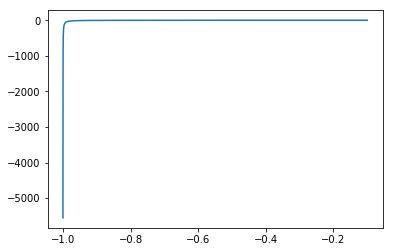

p 1
mu 1
beta 1
ximu 1
xi 0
ximu 1
inf


In [107]:
beta = 1
mu = 1
N = 10000
x = np.linspace(-1,-.1,N)
f = np.zeros(N)
for i in range(N):
    f[i] = n(x[i], beta=beta, mu=1)
plt.plot(x,f)
plt.show()
print(n(1))



In [105]:
beta=1
mu=1
def xi(k, mu=mu):
    xi = k**2 - mu
    print('ximu',mu)
    return xi
def n(p, beta=beta, mu=mu):
    print('p',p)
    print('mu',mu)
    print('beta',beta)
    print('xi',xi(p))
    n = 1 / (np.exp(beta*xi(p)) - 1)
    return n
print(n(.1))
print(xi(.1,mu=1))


p 0.1
mu 1
beta 1
ximu 1
xi -0.99
ximu 1
-1.5912840687376237
ximu 1
-0.99


In [99]:
1 / (np.exp(-0.99) - 1)

-1.5912840687376237

In [108]:
a = 1
b = 1 + 1j
c = a + b
print(c)

(2+1j)


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
zero = 1e-1
cutoff = 1
err = 1.49
mu = 1
beta = 1
R = 1/30
omega = 1
eps = 1                       # infinite small imaginary part 
rkv = 0                         # 2R_p/(k_n^2 v_p)
def xi(k, mu=mu):
    xi = k**2 - mu
    return xi
def n(p, beta=beta):
    n = 1 / (np.exp(beta*xi(p)) - 1)
    return n
def z(omega, q, mu=mu):
    z = omega - 2*q - 2*mu
    return z

def PI(omega, q, eps=eps, mu=mu, zero=zero, cutoff=cutoff,
       err=err):
    def a(k):
        a = (1 + n(k+q/2) + n(-k+q/2))
        return a
    def b(k):
        b = (xi(k+q/2) + xi(-k+q/2) - omega)
        return b
    Irel, error = integrate.quad(lambda k: k**4*(a(k)*b(k)/(b(k)**2 +
                                                            eps**2)), 
                                 zero, cutoff, epsabs=err)
    Iimg, error = integrate.quad(lambda k: k**4*(a(k)*eps**2/(b(k)**2 +
                                                               eps**2)), 
                                 zero, cutoff, epsabs=err)
    I = Irel -1j * Iimg
    PI = 2/(np.pi**2) * I
    return PI



'''
print(np.imag(PI(10,1)))
N = 1000
q = np.linspace(0.1,1,N)
II = np.zeros(N)
for i in range(N):
    II[i] = np.real(PI(10,q[i]))
plt.plot(q,II,'gray')

II = np.zeros(N)
for i in range(N):
    II[i] = np.real(PI(5,q[i]))
plt.plot(q,II,'r')


plt.show()
'''



def PIr(omega, q, R=R, mu=mu, zero=zero, cutoff=cutoff, err=err):
    I, error = integrate.quad(lambda k: k**2, zero, cutoff, epsabs=err)
    PIr = -1/(np.pi**2) * I
    I, error = integrate.quad(lambda k: 1, zero, cutoff, epsabs=err)
    PIr = PIr - z(omega, q)/(2*np.pi**2) * I
    PIr = PIr + PI(omega, q)
    PIr = R * PIr
    return PIr



'''
N = 1000
q = np.linspace(0.1,1,N)
II = np.zeros(N)
for i in range(N):
    II[i] = np.imag(PIr(10,q[i]))
plt.plot(q,II,'gray')
for i in range(N):
    II[i] = np.imag(PIr(1,q[i]))
plt.plot(q,II,'r')

plt.show()
'''



def delta(omega, q, rkv):
    delta = rkv/(4*np.pi) + z(omega, q) + PIr(omega, q)
    delta = np.angle(delta)
    return delta



'''
N = 1000
q = np.linspace(0.1,1,N)
II = np.zeros(N)
for i in range(N):
    II[i] = delta(10,q[i],0)
plt.plot(q,II,'gray')
for i in range(N):
    II[i] = delta(5,q[i],0)
plt.plot(q,II,'r')

plt.show()
'''

 
def omegaInt(rkv, mcutoff=-cutoff, pcutoff=cutoff, cutoff=cutoff,
    beta=beta):
    f = lambda q, omega: 3 * q**2 * (1/(np.exp(beta*omega)-1))\
                                  * delta(omega, q, rkv) 
    omegaInt, error = integrate.dblquad(f, -.1, pcutoff, lambda
                                        omega: zero, lambda omega:
                                        cutoff, epsabs=err)
    return omegaInt

print(omegaInt(0))




In [110]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import integrate
integrate.quad(np.sin,0,1)

(0.45969769413186023, 5.103669643922839e-15)

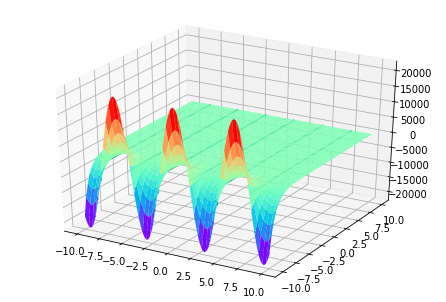

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
N= 200
X = np.linspace(-10,10,N)
Y = np.linspace(-10,10,N)
X, Y = np.meshgrid(X, Y)
u = np.exp(-Y)*np.cos(X)
v = 2*X*Y

ax.plot_surface(X, Y, u,cmap=plt.get_cmap('rainbow'))
#ax.plot_surface(X, Y, v,cmap=plt.get_cmap('rainbow'))
ax.contour(X,Y,u)
plt.show()


In [116]:
a = np.zeros(9)
a.shape = (3,3)
a[1,1] = 2
print(a)

[[0. 0. 0.]
 [0. 2. 0.]
 [0. 0. 0.]]


0.33333333333333337


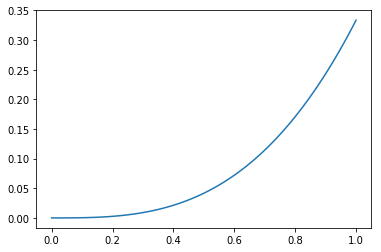

0.08333333333333333


In [144]:
def f(x):
    def a(x):
        return x**2
    f = x + 2
    f = np.exp(f)
    f = f + a(x)
    f, err = integrate.quad(a,0,x)
    return f
x = np.linspace(0,1,100)
print(f(1))
ff = np.frompyfunc(f, 1, 1)
plt.plot(x,ff(x))
plt.show()
cc, err = integrate.quad(ff,0,1)
print(cc)

In [129]:
def triangle_wave(x, c=.6, c0=.4, hc=1.0):
    x = x - int(x) # 三角波的周期为1,因此只取x坐标的小数部分进行计算
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r
x = np.linspace(0, 2, 1000)
print(triangle_wave(x))
#y = triangle_wave(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [145]:
a = 1 + 1j
b = 2/(np.pi**2) * a
print(b)

(0.20264236728467555+0.20264236728467555j)


In [152]:
a = np.array([-0.006027659187943081-0.04144409251243031j, -0.006299198422346123-0.04300357792106825j])
print(np.imag(a))

[-0.04144409 -0.04300358]


In [150]:
np.array([1,2])

array([1, 2])

In [159]:
def f(x):
    f = x + 1j * x
    return f
x = np.linspace(0,1,100)
uf = np.frompyfunc(f,1,1)
y = uf(x)
print(np.imag(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
